# Employee Performance Analysis (INX Future Inc.)

## The following insights are expected.
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

## Steps for Exploratory Data Analysis

1. Load the data
2. Check and treat the null values
3. start basic preprocessing 
4. Start the analysis

### Importing packages from conada environment 

In [1]:
# importing necesssary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport as pp

import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [2]:
#Importing Dataset from drive

data = pd.read_excel('D:/final-project/certification/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data_info = pd.read_excel('D:/final-project/certification//INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls',sheet_name=1)

In [3]:
# getting the size of dataset

data.shape

(1200, 28)

### Info about the dataset regarding columns and other variable

In [4]:
data_info.iloc[:,:]

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,EmpEducationLevel,1 'Below College'
2,NaN,2 'College'
3,NaN,3 'Bachelor'
4,NaN,4 'Master'
5,NaN,5 'Doctor'
6,NaN,NaN
7,EmpEnvironmentSatisfaction,1 'Low'
8,NaN,2 'Medium'
9,NaN,3 'High'


### A quick explanation of the data

In [7]:
# Getting the rough overview if the data by pandas profiling 
# It is a powerful package for quick interaction of the data

pp(data)

### Checking for Empty / Null values to treat the null values

In [8]:
# Checking Null values

data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### Finding out the integer and object data type columns

In [7]:
# counting data types of the columns

data.dtypes.value_counts()

int64     19
object     9
dtype: int64

### Department wise performances

Text(0.5, 1.0, '')

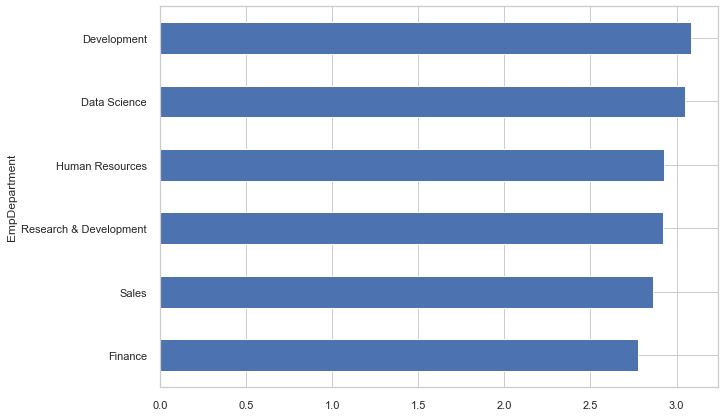

In [9]:
# Objective one complete 

sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
data.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values().plot.barh()
plt.title('')

### Finding out female and male out of total Preformance

------male and female counts----


Male      725
Female    475
Name: Gender, dtype: int64

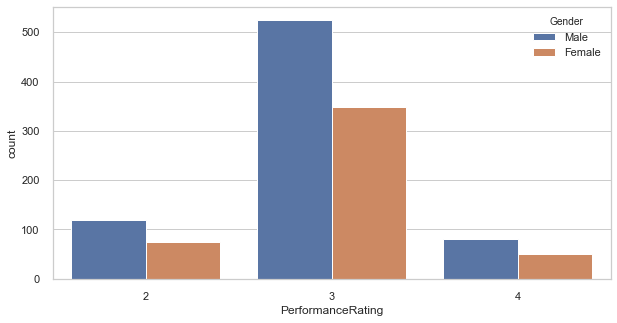

In [10]:
# using seaborn count plot to get the male female count on performance rating

plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceRating',hue='Gender',data=data)
print('------male and female counts----')
data.Gender.value_counts()

### Treating objective data type columns to neumerical

In [10]:
# Selecting object data type columns for coverting to neumerical values

data_obj=data.select_dtypes(include=[object])
print(data_obj.dtypes.value_counts())

object    9
dtype: int64


In [11]:
# Label encodeing the object data. 

data2 =data.copy() 
enc = LabelEncoder()
obj_col = list(data_obj.columns)
for i in obj_col:
    data2[i] = enc.fit_transform(data[i])

### Exploreing the data set with the correlation matrix and heat map

Text(0.5, 1, 'Correlation matrix of the dataset')

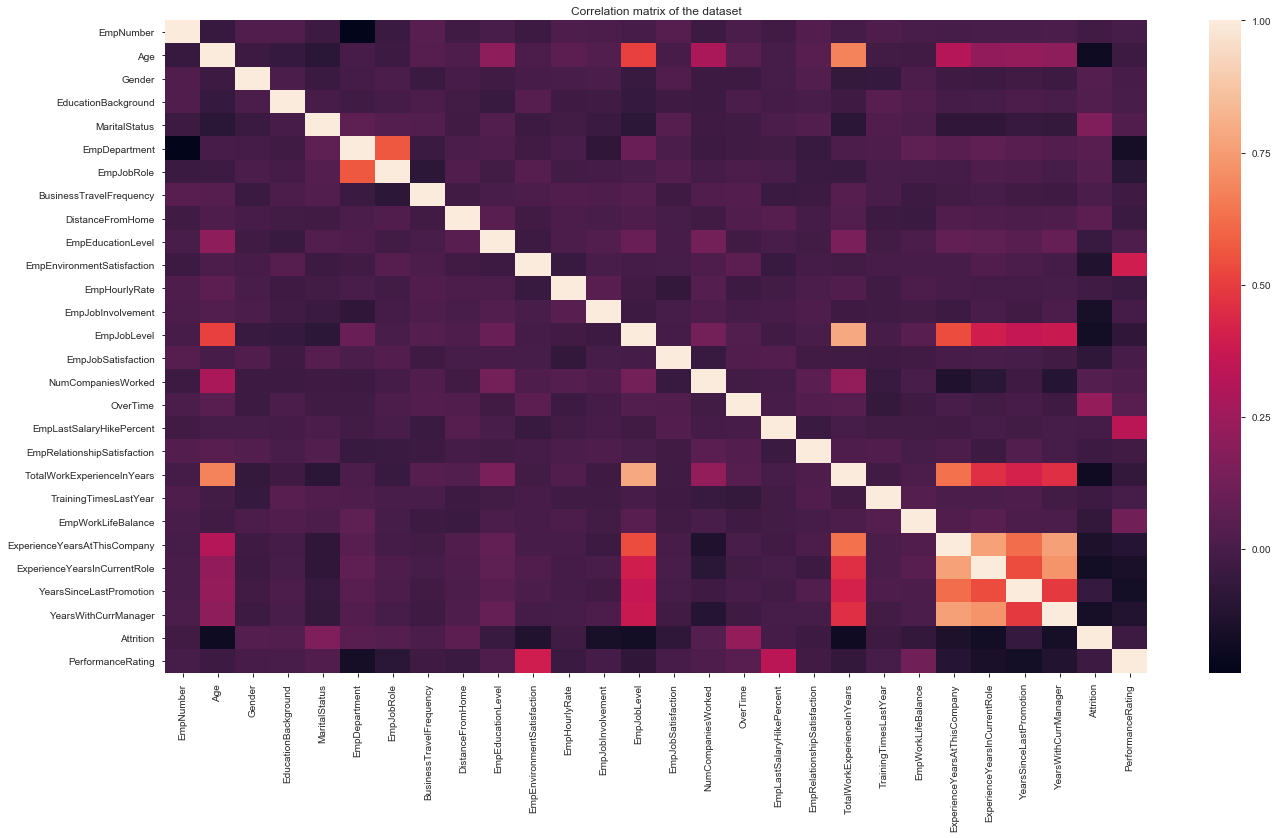

In [12]:
data_corr = data2.corr()
plt.figure(figsize=(22,12))
sns.heatmap(data = data_corr,annot=False)
plt.title('Correlation matrix of the dataset')

### Objective two complete - Top 3 Important Factors effecting employee performance

Text(0.5, 1.0, 'Top-3 Performance affecting features')

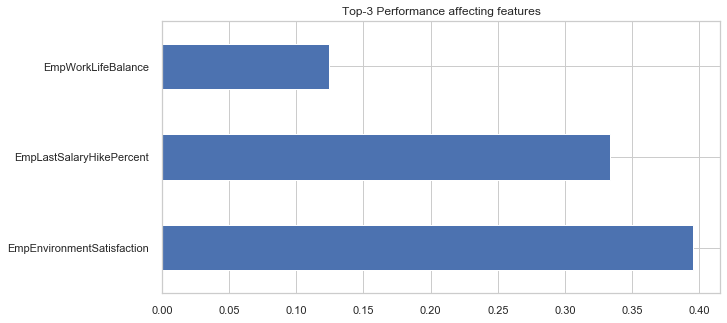

In [14]:
# objective 2 complete - top three features affecting employee performance based on correlation


plt.figure(figsize=(10,5))
data_corr.PerformanceRating.sort_values(ascending = False )[1:4].plot.barh()
plt.title('Top-3 Performance affecting features')

### Finding factores that affects the Performance of Employee

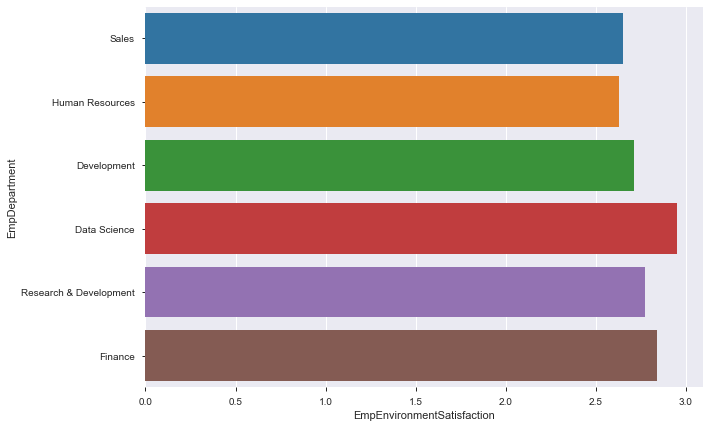

In [13]:
plt.figure(figsize=(10,7))
sns.barplot(x='EmpEnvironmentSatisfaction',y='EmpDepartment',data=data,ci=None)

### Box plot of the data

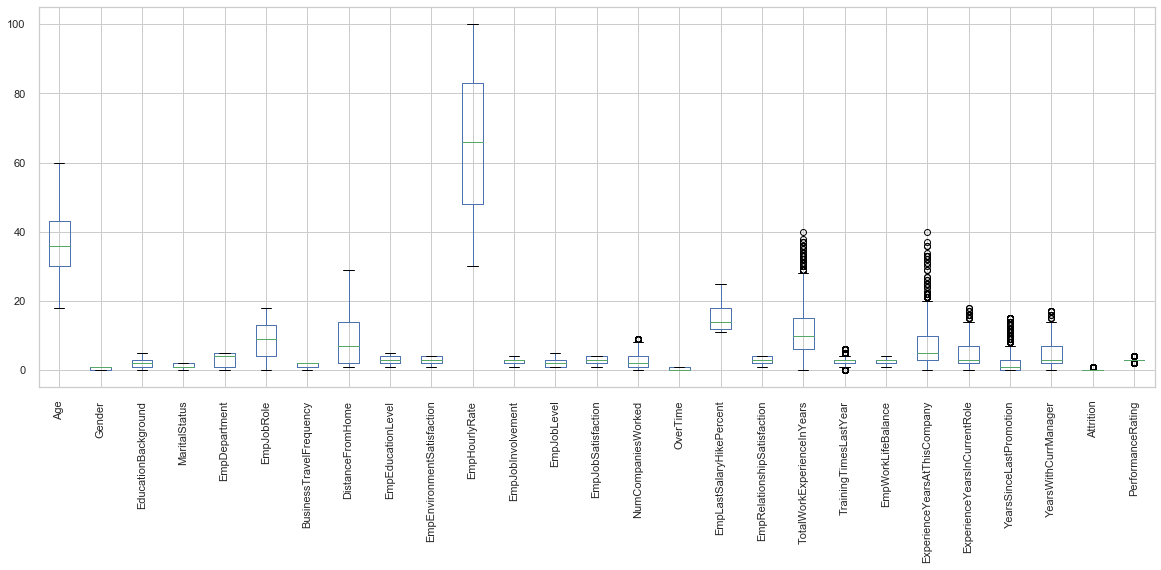

In [16]:
data2.iloc[:,1:].boxplot(rot=90,figsize=(20,7))

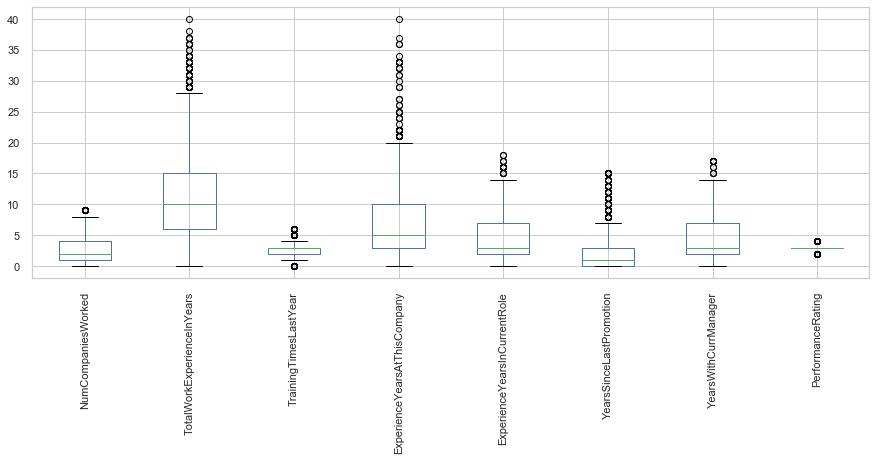

In [17]:
data2.loc[:,['NumCompaniesWorked',
      'TotalWorkExperienceInYears',
      'TrainingTimesLastYear',
      'ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole',
      'YearsSinceLastPromotion',
     'YearsWithCurrManager',
      'PerformanceRating']].boxplot(figsize=(15,5),rot=90)

### Cretain time period are also affecting performance

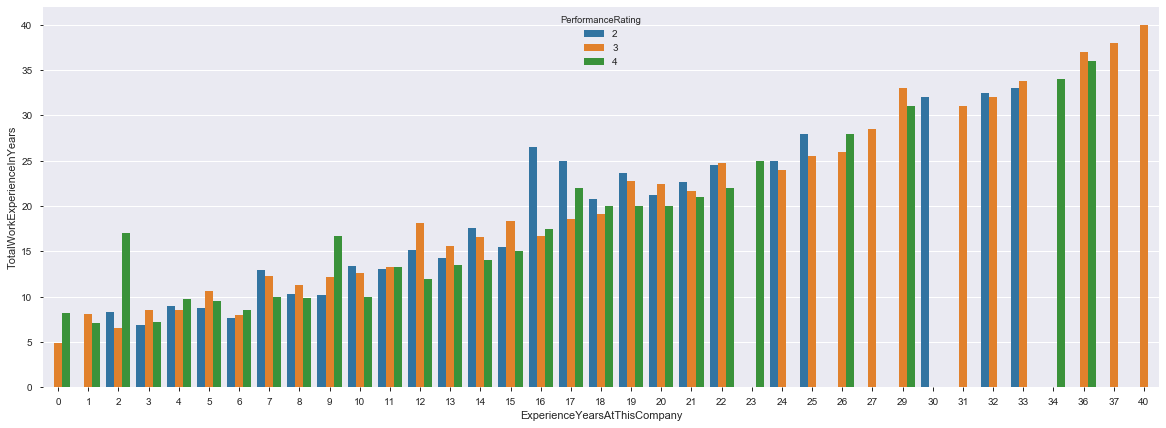

In [14]:
plt.figure(figsize=(20,7))
sns.barplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',hue='PerformanceRating',data=data2,ci=None)

###  Without a salary hike affecting also affecting the performance of the employee.

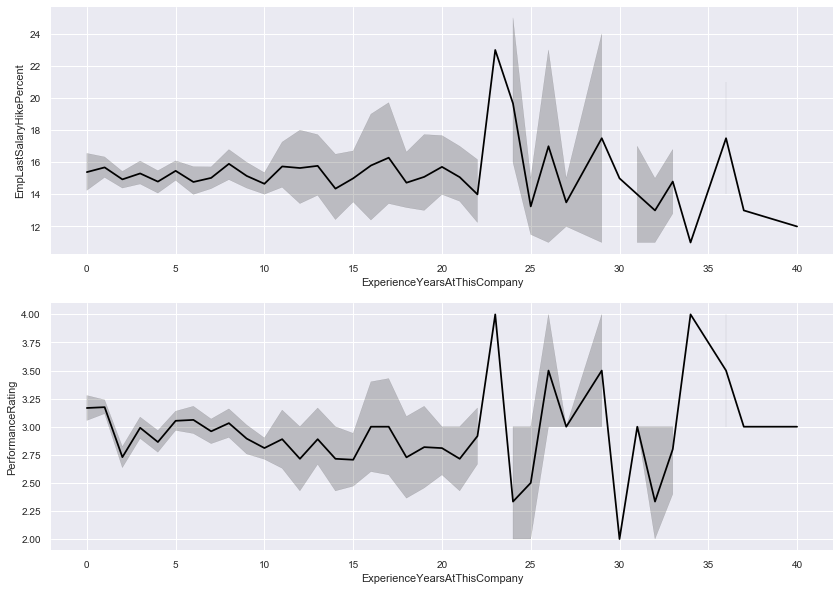

In [71]:
# Objectiv 4 Complete

fig, (ax,ax1)=plt.subplots(2,1,figsize=(14,10))
sns.lineplot(x='ExperienceYearsAtThisCompany',y='EmpLastSalaryHikePercent',data=data2,sizes = 5,color = 'black',ax=ax)
sns.lineplot(x='ExperienceYearsAtThisCompany',y='PerformanceRating',data=data2,sizes = 5,color = 'black',ax=ax1)

## Steps For Modeling the data to predict the preformance

### Spliting the data for modeling

In [19]:
X = data2.iloc[:,:-1]
y = data2.iloc[:,-1]

### Importing Packages to model the data

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline as mp
from imblearn.pipeline import make_pipeline as imp
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

from scikitplot.estimators import plot_learning_curve,plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix , plot_precision_recall_curve,plot_roc_curve

import optuna

### Spliting the dataset for training and testing 

In [25]:
# X = features of the data set
# y = Target variable

X = data2.iloc[:,:-1]
y = data2.iloc[:,-1]

In [26]:
# data spliting as 70 % for training and 30 % for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [90]:
# using Random forest classifier feature extraction

rf = RandomForestClassifier(random_state=5).fit(X_train,y_train)

### Identifying important features

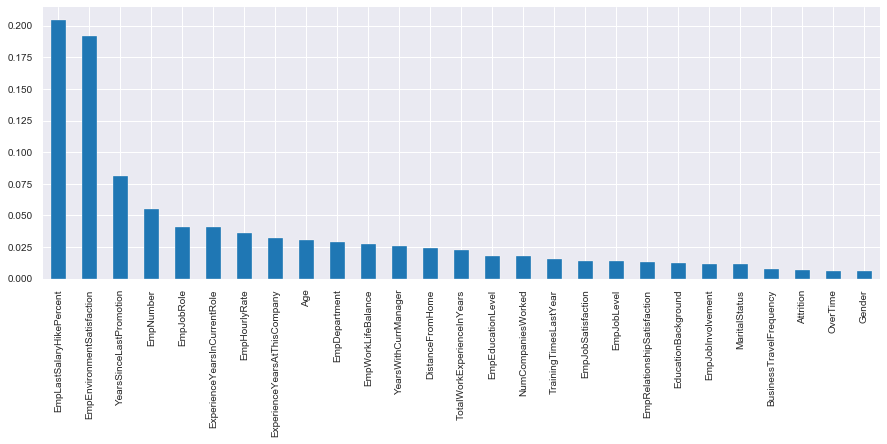

In [91]:
feat_imp = pd.Series(rf.feature_importances_, index=data.columns[:-1])
plt.figure(figsize=(15,5))
feat_imp.sort_values(ascending = False).plot.bar()

### Evaluateing multiple model to choose the efficient model

In [29]:
def estimateor(var):
    fig, ax= plt.subplots(2,2,figsize=(20, 13))
    models = mp(StandardScaler(),var)
    models.fit(X_train,y_train)
    print('accuracy score = ', accuracy_score(y_test,models.predict(X_test)))
    
    show=[plot_learning_curve(var ,X= X_train,y =y_train,cv = 5,ax=ax[0,0]),
          plot_precision_recall_curve(y_test, models.predict_proba(X_test),ax=ax[0,1]),
          plot_confusion_matrix(y_test, models.predict(X_test),ax=ax[1,0]),
          plot_roc_curve(y_test,models.predict_proba(X_test),ax=ax[1,1])]
    return show

rf
accuracy score =  0.9611111111111111
XGBC
accuracy score =  0.9527777777777777
LGBMC
accuracy score =  0.9527777777777777


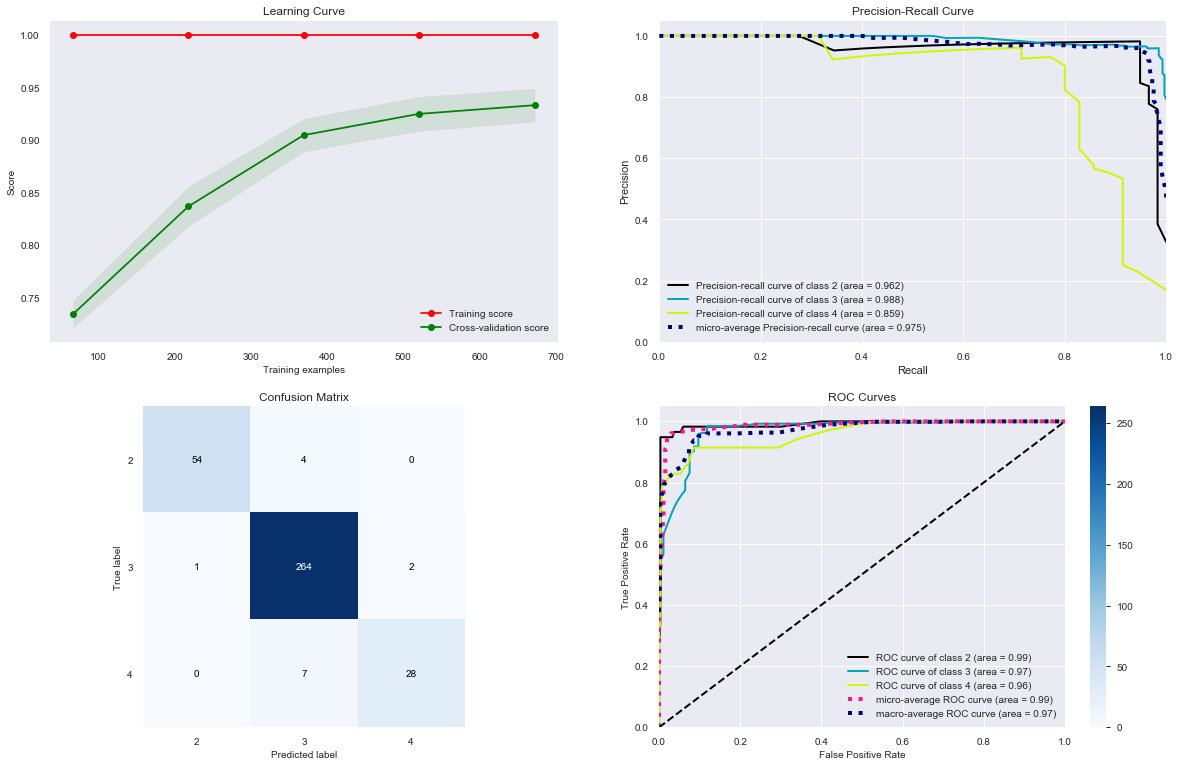

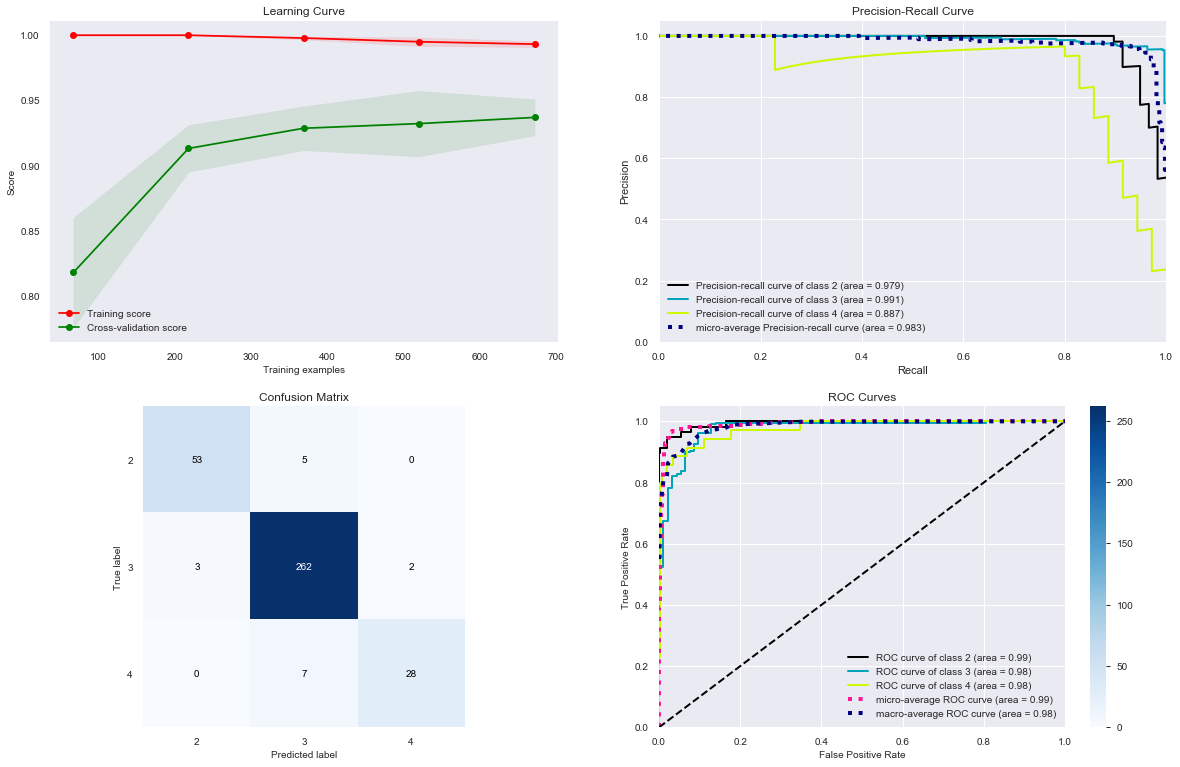

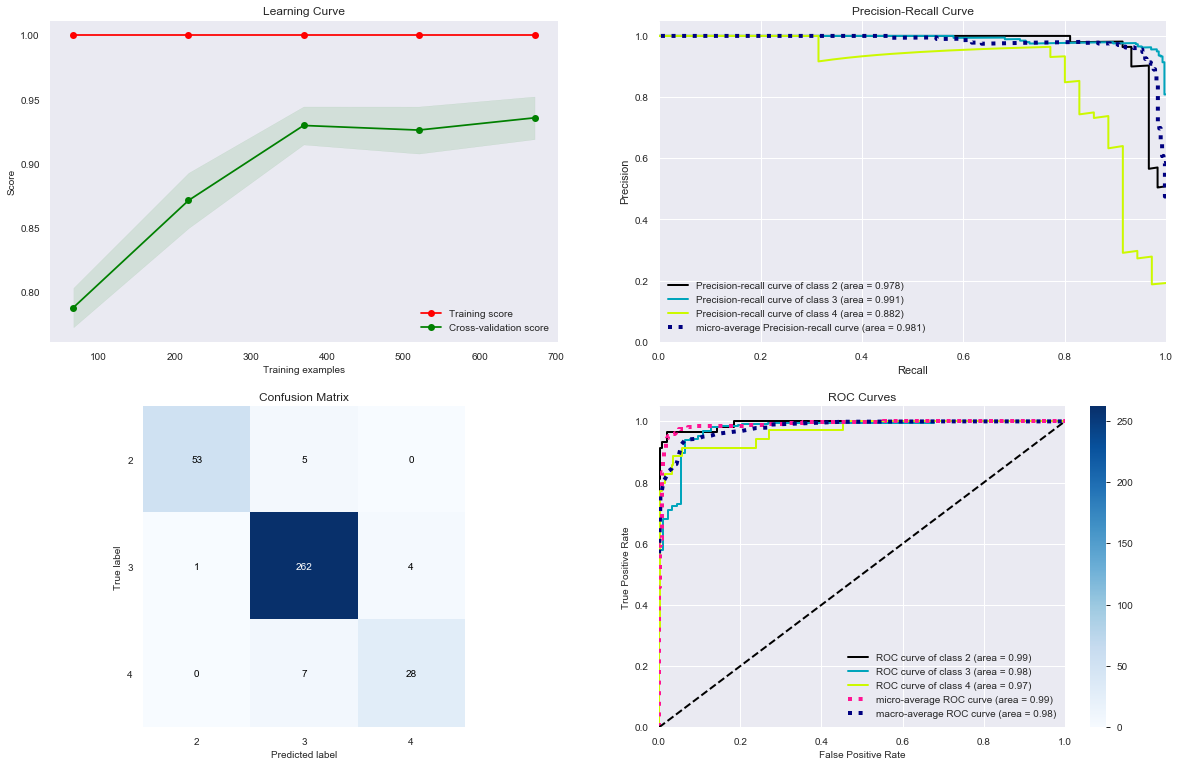

In [30]:
sns.set_style(style='darkgrid')
est = [RandomForestClassifier(random_state=5),XGBClassifier(random_state=5),LGBMClassifier(random_state=5)]
name = ['rf','XGBC','LGBMC']
for i in range(len(name)):
    print(name[i])
    estimateor(est[i])

### Evaluating model by balanceing the imbalance data

In [36]:
def estimator2(var):
    fig, ax= plt.subplots(2,2,figsize=(20, 13))
    models = imp(SMOTE(),StandardScaler(),var)
    models.fit(X_train,y_train)
    print('accuracy score = ', accuracy_score(y_test,models.predict(X_test)))
    show=[plot_learning_curve(var ,X= X_train,y =y_train,cv = 5,ax=ax[0,0]),
          plot_precision_recall_curve(y_test, models.predict_proba(X_test),ax=ax[0,1]),
          plot_confusion_matrix(y_test, models.predict(X_test),ax=ax[1,0]),
          plot_roc_curve(y_test,models.predict_proba(X_test),ax=ax[1,1])]
    return show

rf
accuracy score =  0.9305555555555556
XGBC
accuracy score =  0.9166666666666666
LGBMC
accuracy score =  0.9222222222222223


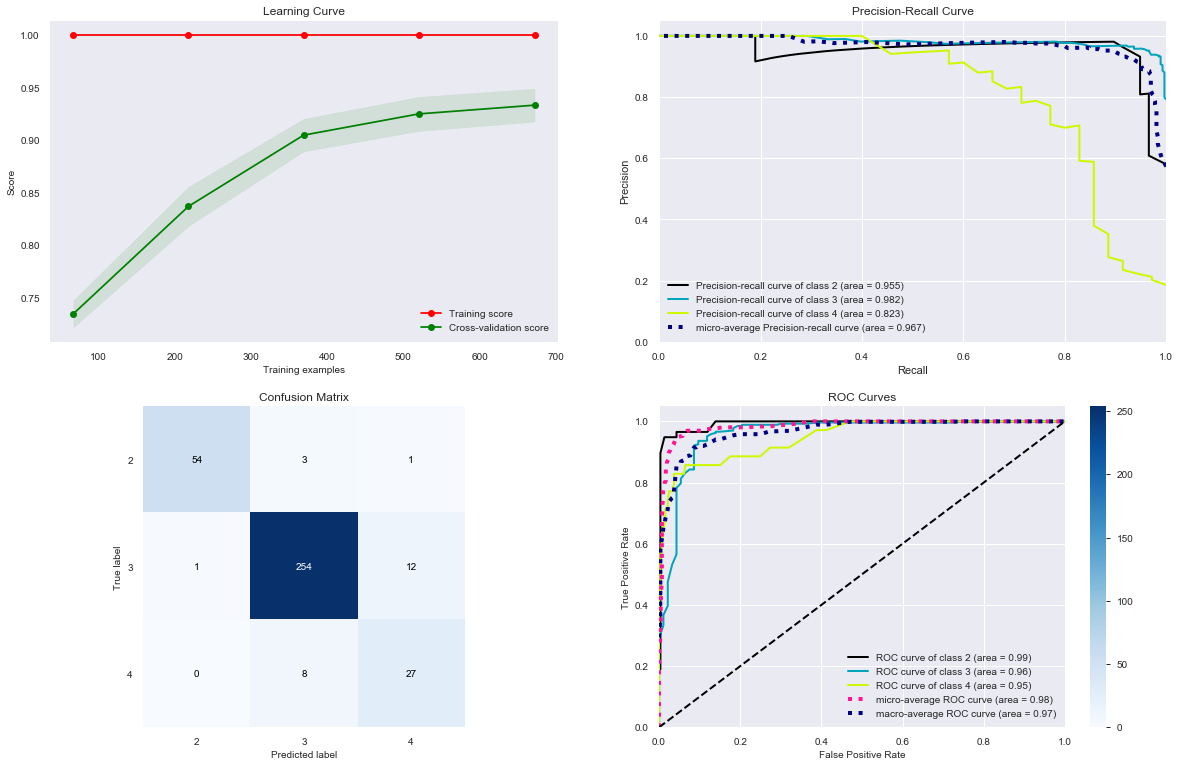

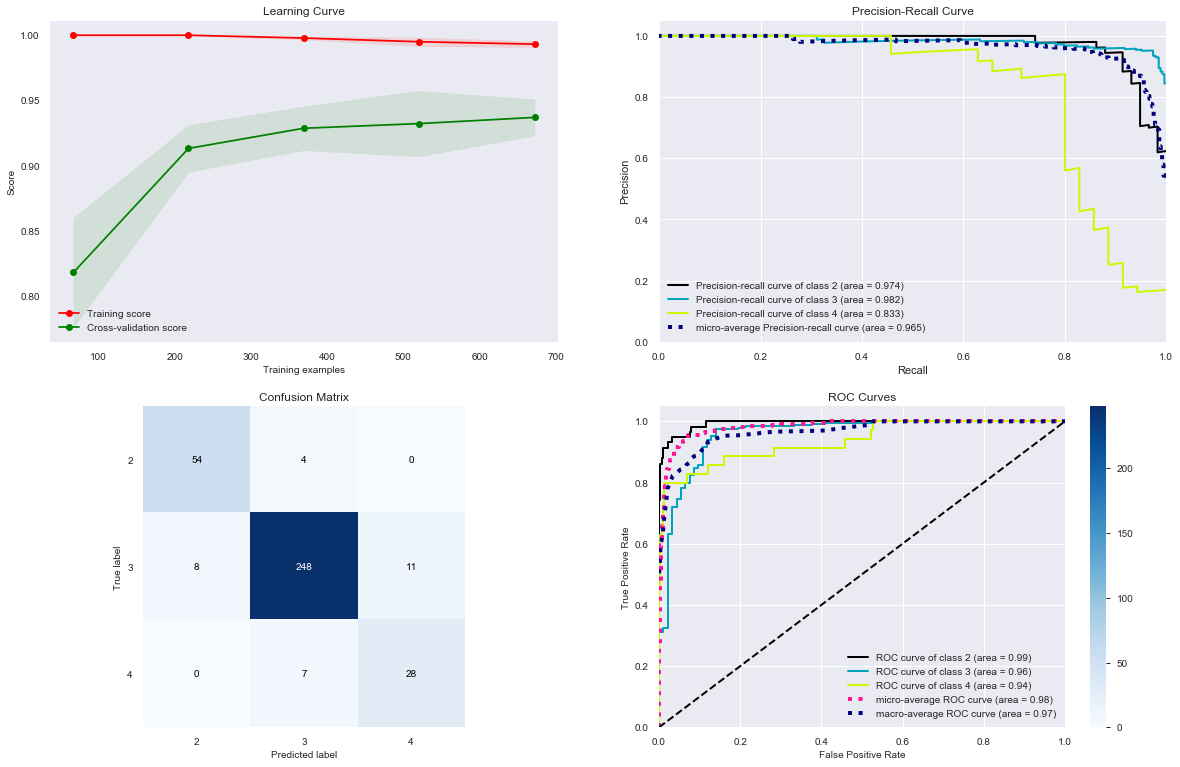

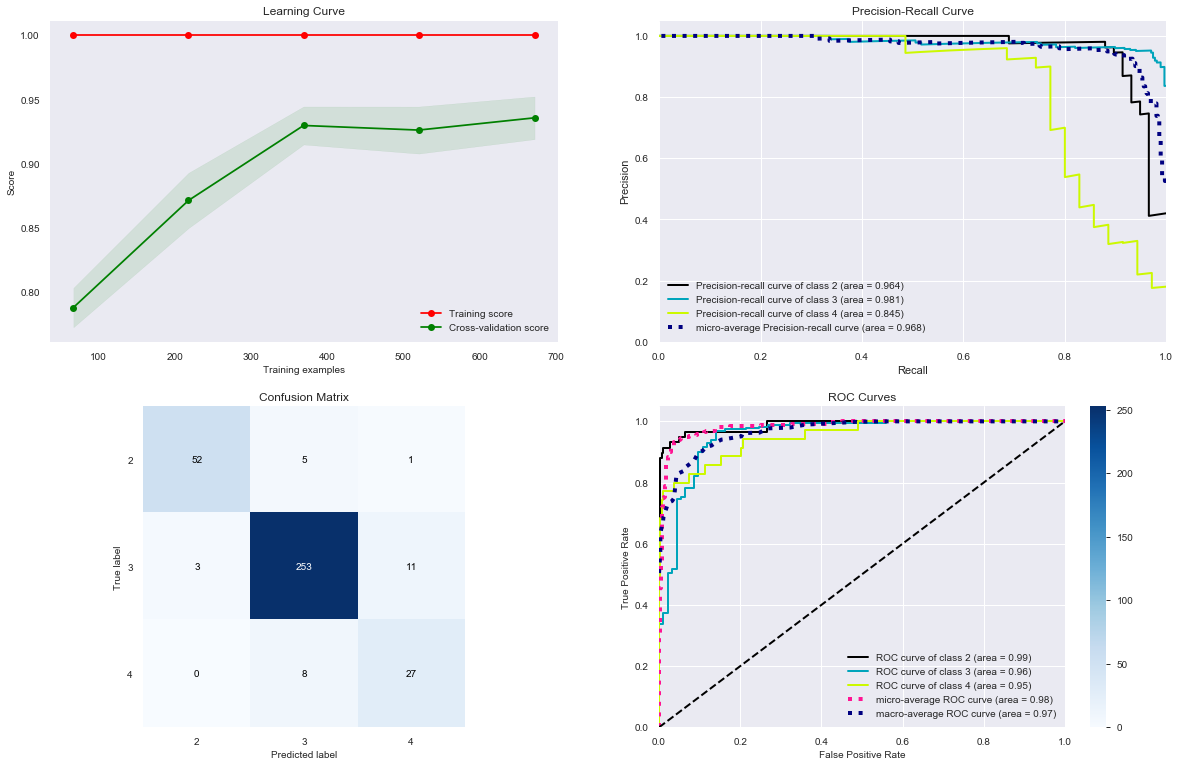

In [37]:
est = [RandomForestClassifier(random_state=5),XGBClassifier(random_state=5),LGBMClassifier(random_state=5)]
name = ['rf','XGBC','LGBMC']
for i in range(len(name)):
    print(name[i])
    estimator2(est[i])

### Chooseing LGBMClassifire as final model and training it


Faster training speed and higher efficiency.

Lower memory usage.

Better accuracy.

#### This model is also as good as other two but intuitively i am chooseing this model as final model

### Checking performance - Model with raw data with hyper parameter tune

In [41]:
 params1 = {
        
        'random_state':210,
        'max_depth':13,
        'learning_rate':0.274666,
        'n_estimators':67,
        'boosting_type':'gbdt',
        
            }

coun=np.mean(cross_val_score(LGBMClassifier(**params1),X_train,y=y_train,cv=5,verbose=1))
print()
print('accuracy cross val=',coun)
model_eval=LGBMClassifier(**params1).fit(X_train,y_train)
print()
print('model accuracy=',accuracy_score(y_test,model_eval.predict(X_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished



accuracy cross val= 0.9392857142857143

model accuracy= 0.95


### Model with over sampling - performance with hyper parameter-tune

In [49]:
params2 = {
       'reandom_state':175,
        'max_depth':15,
        'learning_rate':0.044118,
        'n_estimators':938,
       
            }

model_eval=imp(SMOTE(),StandardScaler(),LGBMClassifier(**params2))
coun=np.mean(cross_val_score(model_eval,X_train,y=y_train,cv=5,verbose=1))
print()
print('accuracy_score_cross_val_with_smote=',coun)
model_eval.fit(X_train,y_train)
print('accuracy =',accuracy_score(y_test,model_eval.predict(X_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.2s finished



accuracy_score_cross_val_with_smote= 0.9130952380952382
accuracy = 0.9222222222222223


### Model Performance with only sclaling - Performance

In [45]:
params3 = {
       'reandom_state':175,
        'max_depth':15,
        'learning_rate':0.044118,
        'n_estimators':938,
       
            }

model_eval_end=mp(StandardScaler(),LGBMClassifier(**params3))
coun=np.mean(cross_val_score(model_eval_end,X_train,y=y_train,cv=5,verbose=1))
print()
print('accuracy_score_cross_val =',coun)
model_eval_end.fit(X_train,y_train)
print('accuracy by standard scalar=',accuracy_score(y_test,model_eval_end.predict(X_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.8s finished



accuracy_score_cross_val = 0.930952380952381
accuracy by standard scalar= 0.95


### Model performance with scale being taken for further evaluation

In [50]:
def estimator2(var):
    fig, ax= plt.subplots(2,2,figsize=(20, 13))
    models = mp(StandardScaler(),var)
    models.fit(X_train,y_train)
    print('accuracy score = ', accuracy_score(y_test,models.predict(X_test)))
    
    show=[plot_learning_curve(var ,X= X_train,y =y_train,cv = 5,ax=ax[0,0]),
          plot_precision_recall_curve(y_test, models.predict_proba(X_test),ax=ax[0,1]),
          plot_confusion_matrix(y_test, models.predict(X_test),ax=ax[1,0]),
          plot_roc_curve(y_test,models.predict_proba(X_test),ax=ax[1,1])]
    return show

### Objective 3 complete - Model training , tuning and evaluation

accuracy score =  0.95


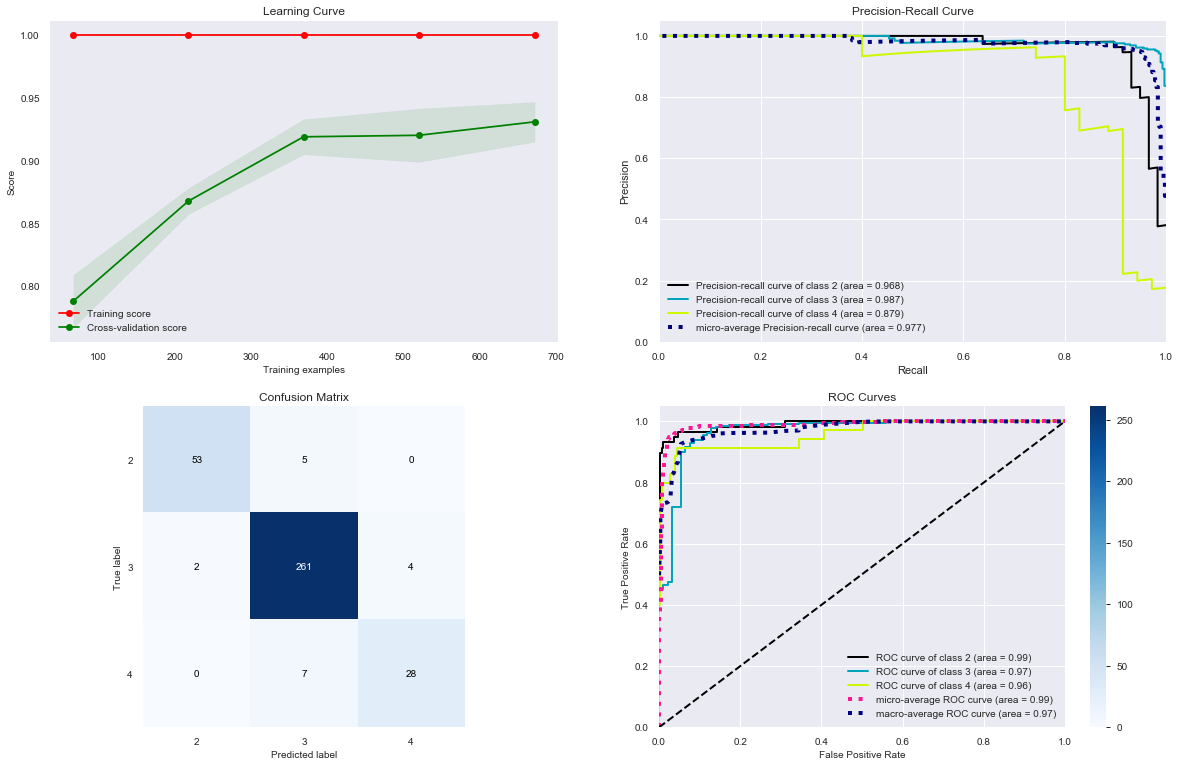

In [51]:
estimator2(LGBMClassifier(**params3))